# From Assignment 2

In [1]:
import lucem_illud 

import pandas #gives us DataFrames
import numpy as np #For divergences/distances
import scipy #For divergences/ distances/ hierarchical clustering and some visuals

import nltk #the Natural Language Toolkit
from nltk.corpus import stopwords #For stopwords

import seaborn as sns #makes our plots look nicer
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import wordcloud #Makes word clouds

#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import sklearn.manifold #For a manifold plot

import gensim#For topic modeling

from bs4 import BeautifulSoup
import requests #for http requests
from requests import get
import urllib.parse #For joining urls
import re #for regexs
import json #For API responses

import itertools

%matplotlib inline

## Load Data Frame

In [2]:
ECONOMIST_Token = pandas.read_csv('ECONOMIST_Token_Neat.csv')

In [4]:
ECONOMIST_Token = ECONOMIST_Token.drop(columns = ['Unnamed: 0'])

In [4]:
ECONOMIST_Token[:3]

,Year,Month,Day,Title,Tag,Article,Token_Word,Remark_Index
0,2006,1,14,Nuclear proliferation Misreading Iran,Leaders,\n\t\t\tSpecial report Iran's nuclear programm...,"['Special', 'report', 'Iran', ""'s"", 'nuclear',...",31
1,2006,1,14,UN reform Fix it or scrap it,Leaders,\n\t\t\tMexico and the United States Shots acr...,"['Mexico', 'and', 'the', 'United', 'States', '...",58
2,2006,1,14,Spain and its regions A Catalan kerfuffle,Leaders,\n\t\t\tSpain and Catalonia Bad echoes from th...,"['Spain', 'and', 'Catalonia', 'Bad', 'echoes',...",45


In [3]:
Topics = ['Leaders', 'Britain', 'Europe', 'United States', 'The Americas', 
              'Middle East and Africa', 'Asia', 'Obituary',
              'Business', 'Finance and economics', 'Science and technology', 'Books and arts']

years = ['2006','2007','2008','2009','2010']

## Count the Words

In [4]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)


In [2]:
# Finance and Economics
f = open('ALLFinance and economics.txt','r')
Fin_econ = f.read()
f.close()

# Business
f = open('ALLBusiness.txt','r')
Business = f.read()
f.close()

# Science and technology
f = open('ALLScience and technology.txt','r')
Sci_tech = f.read()
f.close()

# Books and arts
f = open('ALLBooks and arts.txt','r')
Book_art = f.read()
f.close()

In [3]:
Fin_econ_tokens = nltk.word_tokenize(Fin_econ)
Business_tokens = nltk.word_tokenize(Business)
Sci_tech_tokens = nltk.word_tokenize(Sci_tech)
Book_art_tokens = nltk.word_tokenize(Book_art)

In [7]:
Fin_econ_countedWords = wordCounter(Fin_econ_tokens)
Business_countedWords = wordCounter(Business_tokens)
Sci_tech_countedWords = wordCounter(Sci_tech_tokens)
Book_art_countedWords = wordCounter(Book_art_tokens)

In [10]:
Fin_econ_countedWords.sort_values('count', ascending=False, inplace=True)
Business_countedWords.sort_values('count', ascending=False, inplace=True)
Sci_tech_countedWords.sort_values('count', ascending=False, inplace=True)
Book_art_countedWords.sort_values('count', ascending=False, inplace=True)

In [9]:
Fin_econ_countedWords[100:105]
Business_countedWords[100:105]
Sci_tech_countedWords[100:105]
Book_art_countedWords[100:105]

,count,word
338,1255,do
570,1224,life
69,1223,may
573,1198,could
726,1176,'


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jingyingb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
Fin_econ_Text = nltk.Text(Fin_econ_tokens)
Fin_econ_Text.collocations()
print('--------')
Business_Text = nltk.Text(Business_tokens)
Business_Text.collocations()
print('--------')
Sci_tech_Text = nltk.Text(Sci_tech_tokens)
Sci_tech_Text.collocations()
print('--------')
Book_art_Text = nltk.Text(Book_art_tokens)
Book_art_Text.collocations()

Hong Kong; ... ...; see chart; interest rates; New York; hedge funds;
United States; Wall Street; last year; Economics focus; South Korea;
Federal Reserve; Goldman Sachs; central banks; Morgan Stanley; central
bank; Merrill Lynch; compa¬ nies; bil¬ lion; govern¬ ment
--------
last year; Hong Kong; New York; chief executive; see chart; Face
value; years ago; compa¬ nies; United States; com¬ pany; bil¬ lion;
South Korea; busi¬ ness; govern¬ ment; five years; Wall Street; gov¬
ernment; San Francisco; be¬ tween; be¬ cause
--------
years ago; United States; New York; stem cells; peo¬ ple; online
column; carbon dioxide; Uni¬ versity; personal technology; be¬ tween;
Hong Kong; climate change; pub¬ lished; col¬ leagues; last year; Los
Angeles; nerve cells; be¬ cause; mobile phones; South Korea
--------
New York; ... ...; United States; Middle East; online column; years
ago; Wall Street; Hong Kong; prime minister; present columns;
University Press; be¬ tween; Soviet Union; art markets; last yea

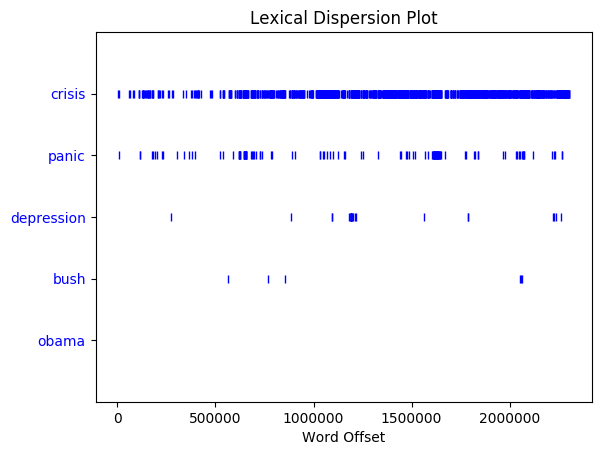

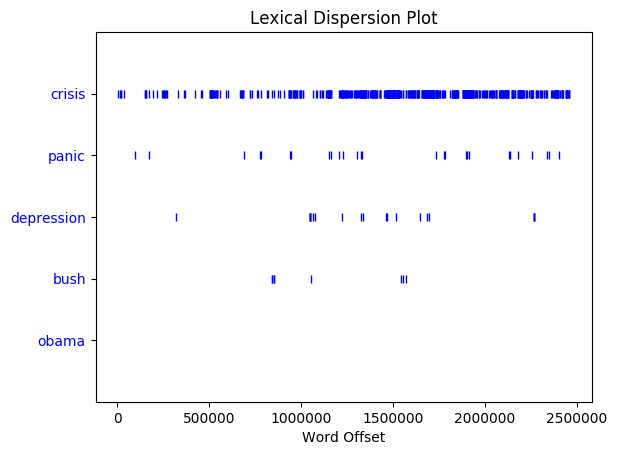

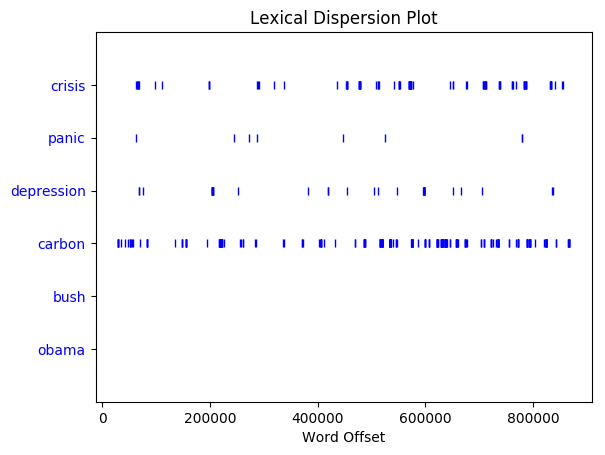

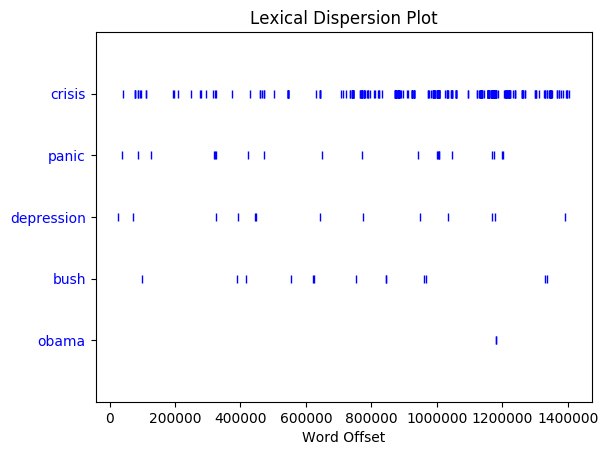

In [14]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
Fin_econ_Text.dispersion_plot(['crisis', 'panic' ,'depression', 'bush','obama'])
sns.set()

sns.reset_orig() #Seaborn messes with this plot, disabling it
Business_Text.dispersion_plot(['crisis', 'panic' ,'depression', 'bush','obama'])
sns.set()

sns.reset_orig() #Seaborn messes with this plot, disabling it
Sci_tech_Text.dispersion_plot(['crisis', 'panic' ,'depression', 'carbon', 'bush', 'obama'])
sns.set()

sns.reset_orig() #Seaborn messes with this plot, disabling it
Book_art_Text.dispersion_plot(['crisis', 'panic' ,'depression', 'bush', 'obama'])
sns.set()

## 2.1 Stop Word List and Normalization

In [4]:
nltk.download('wordnet')
wordnet = nltk.stem.WordNetLemmatizer()
#wordnet.lemmatize('are')
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Uncomment this line if you want to use your own list of stopwords.

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jingyingb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# --------Stop List + Snowball Stemmer--------
Fin_econ_normalized = normlizeTokens(Fin_econ_tokens, 
                                     stopwordLst = stop_words_nltk, 
                                     stemmer = snowball)

# --------Stop List + Snowball Stemmer--------
Business_normalized = normlizeTokens(Business_tokens, 
                                     stopwordLst = stop_words_nltk, 
                                     stemmer = snowball)

# --------Stop List + Snowball Stemmer--------
Sci_tech_normalized = normlizeTokens(Sci_tech_tokens, 
                                     stopwordLst = stop_words_nltk, 
                                     stemmer = snowball)

# --------Stop List + Snowball Stemmer--------
Book_art_normalized = normlizeTokens(Book_art_tokens, 
                                     stopwordLst = stop_words_nltk, 
                                     stemmer = snowball)

In [15]:
print('By normalization, the word counts in Fin_econ decrease from '+ 
      str(len(Fin_econ_tokens)) + ' to ' + 
      str(len(Fin_econ_normalized)))

By normalization, the word counts in Fin_econ decrease from 2304689 to 1082567


In [16]:
print('By normalization, the word counts in Business decrease from '+ 
      str(len(Business_tokens)) + ' to ' + 
      str(len(Business_normalized)))

By normalization, the word counts in Business decrease from 2486335 to 1172374


In [17]:
print('By normalization, the word counts in Sci_tech decrease from '+ 
      str(len(Sci_tech_tokens)) + ' to ' + 
      str(len(Sci_tech_normalized)))

By normalization, the word counts in Sci_tech decrease from 870651 to 402963


In [18]:
print('By normalization, the word counts in Book_art decrease from '+ 
      str(len(Book_art_tokens)) + ' to ' + 
      str(len(Book_art_normalized)))

By normalization, the word counts in Book_art decrease from 1405589 to 649146


In [19]:
Fin_econ_normalized
Fin_econ_cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in Fin_econ_normalized))

Business_normalized
Business_cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in Business_normalized))

Sci_tech_normalized
Sci_tech_cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in Sci_tech_normalized))

Book_art_normalized
Book_art_cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in Book_art_normalized))

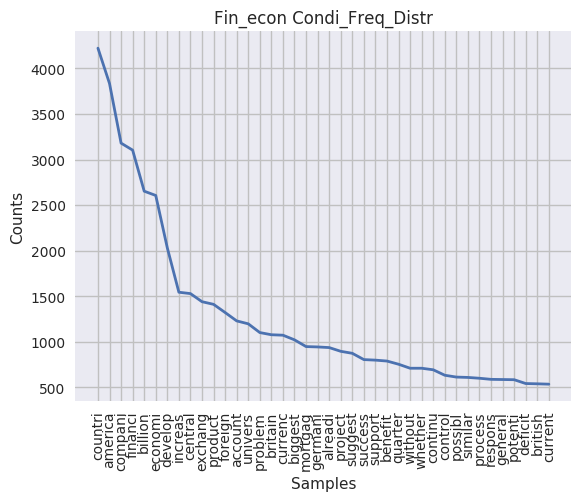

In [22]:
fig = plt.figure()
plt.title('Fin_econ Condi_Freq_Distr')
Fin_econ_cfdist[7].plot(40)

#fig = plt.figure()
#plt.title('Sci_tech Condi_Freq_Distr')
#Sci_tech_cfdist[7].plot(40)

#fig = plt.figure()
#plt.title('Book_art Condi_Freq_Distr')
#Book_art_cfdist[7].plot(40)

## 2.5 World Cloud

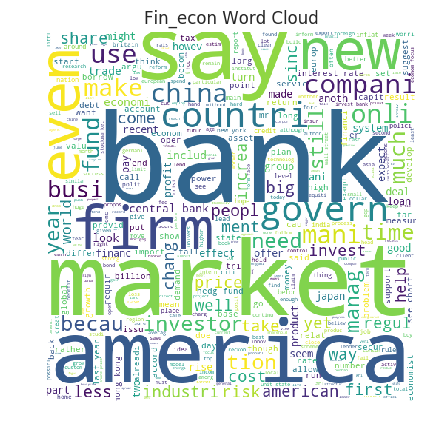

In [99]:
x1 = Fin_econ_normalized
while 'one' in x1: x1.remove('one')
while 'may' in x1: x1.remove('may')
while 'also' in x1: x1.remove('also')
while 'ing' in x1: x1.remove('ing')
while 'work' in x1: x1.remove('work')
    
wc1 = wordcloud.WordCloud(background_color="white", max_words=400, 
                          width= 1000, height = 1000, mode ='RGBA', 
                          scale=.5).generate(' '.join(x1))
plt.figure()

plt.title('Fin_econ Word Cloud')
plt.imshow(wc1)
plt.axis("off")

plt.show()

## Bigram and Trigram

In [11]:
# count the number of bigrams
Fin_econ_Bigrams = nltk.collocations.BigramCollocationFinder.from_words(Fin_econ_normalized)
print("There are {} bigrams in the Fin_econ finder".format(Fin_econ_Bigrams.N))

Business_Bigrams = nltk.collocations.BigramCollocationFinder.from_words(Business_normalized)
print("There are {} bigrams in the Business finder".format(Business_Bigrams.N))

Sci_tech_Bigrams = nltk.collocations.BigramCollocationFinder.from_words(Sci_tech_normalized)
print("There are {} bigrams in the Sci_tech finder".format(Sci_tech_Bigrams.N))

Book_art_Bigrams = nltk.collocations.BigramCollocationFinder.from_words(Book_art_normalized)
print("There are {} bigrams in the Book_art finder".format(Book_art_Bigrams.N))


There are 1082567 bigrams in the Fin_econ finder
There are 1172374 bigrams in the Business finder
There are 402963 bigrams in the Sci_tech finder
There are 649146 bigrams in the Book_art finder


In [12]:
def bigramScoring(count, wordsTuple, total):
    return count

birgramScores = []
def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    #birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

In [ ]:
print(Fin_econ_Bigrams.nbest(bigramScoring, 10))
Fin_econ_Bigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[8000:8010]))

print('-----------------')
print(Business_Bigrams.nbest(bigramScoring, 10))
Business_Bigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[8000:8010]))

print('-----------------')
print(Sci_tech_Bigrams.nbest(bigramScoring, 10))
Sci_tech_Bigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[8000:8010]))

print('-----------------')
print(Book_art_Bigrams.nbest(bigramScoring, 10))
Book_art_Bigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[8000:8010]))

[('central', 'bank'), ('hedg', 'fund'), ('interest', 'rate'), ('last', 'year'), ('hong', 'kong'), ('see', 'chart'), ('new', 'york'), ('invest', 'bank'), ('unit', 'state'), ('econom', 'focus')]

-----------------
[('last', 'year'), ('say', 'mr'), ('chief', 'execut'), ('year', 'ago'), ('new', 'york'), ('hong', 'kong'), ('see', 'chart'), ('next', 'year'), ('face', 'valu'), ('five', 'year')]

-----------------
[('year', 'ago'), ('scienc', 'technolog'), ('also', 'section'), ('last', 'year'), ('stem', 'cell'), ('climat', 'chang'), ('new', 'york'), ('unit', 'state'), ('friday', 'column'), ('person', 'technolog')]

-----------------
[('new', 'york'), ('press', 'page'), ('book', 'art'), ('year', 'ago'), ('also', 'section'), ('last', 'year'), ('world', 'war'), ('unit', 'state'), ('middl', 'east'), ('art', 'market')]



In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
Fin_econ_Trigrams = nltk.collocations.TrigramCollocationFinder.from_words(Fin_econ_normalized)
Fin_econ_Trigrams.score_ngrams(trigram_measures.student_t)[1:10]

Business_Trigrams = nltk.collocations.TrigramCollocationFinder.from_words(Business_normalized)
Business_Trigrams.score_ngrams(trigram_measures.student_t)[1:10]

Sci_tech_Trigrams = nltk.collocations.TrigramCollocationFinder.from_words(Sci_tech_normalized)
Sci_tech_Trigrams.score_ngrams(trigram_measures.student_t)[1:10]

Book_art_Trigrams = nltk.collocations.TrigramCollocationFinder.from_words(Book_art_normalized)
Book_art_Trigrams.score_ngrams(trigram_measures.student_t)[1:10]

## Heat Maps for KL, chi2, KS, and Wasserstein Divergence

In [8]:
# build the corpora containing the four files. 
corpora = []
corpora.append(Fin_econ_normalized)
corpora.append(Business_normalized)
corpora.append(Sci_tech_normalized)
corpora.append(Book_art_normalized)

Fin_econ_Words = set(Fin_econ_normalized)
Business_Words = set(Business_normalized)
Sci_tech_Words = set(Sci_tech_normalized)
Book_art_Words = set(Book_art_normalized)

commonWords = Fin_econ_Words & Business_Words & Sci_tech_Words & Book_art_Words
commonDict = {word: index for index, word in enumerate(commonWords)}
commonDict['student']

def makeProbsArray(tokens, commonDict):
    countList = [0] * len(commonDict)
    for word in tokens:
        try:
            countList[commonDict[word]] += 1
        except KeyError:
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

# define the divergence function
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)


In [9]:
# divergence plot between four corpora          
fileids = []
fileids.append('Fin_econ')
fileids.append('Business')
fileids.append('Sci_tech')
fileids.append('Book_art')
fileids

L_KL = []
L_chi2 = []
L_KS = []
L_Wass = []
for p in corpora:
    l_KL = []
    l_chi2 = []
    l_KS = []
    l_Wass = []
    for q in corpora:
        l_KL.append(Divergence(p,q, difference = 'KL'))
        l_chi2.append(Divergence(p,q, difference = 'Chi2'))
        l_KS.append(Divergence(p,q, difference = 'KS'))
        l_Wass.append(Divergence(p,q, difference = 'Wasserstein'))
    L_KL.append(l_KL)
    L_chi2.append(l_chi2)
    L_KS.append(l_KS)
    L_Wass.append(l_Wass)
    
Diverge_KL = np.array(L_KL)
Diverge_chi2 = np.array(L_chi2)
Diverge_KS = np.array(L_KS)
Diverge_Wass = np.array(L_Wass)


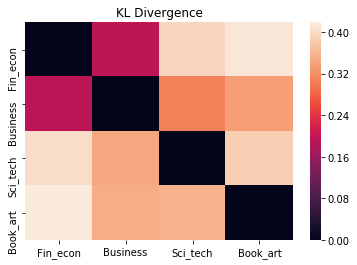

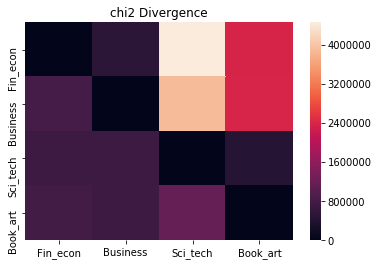

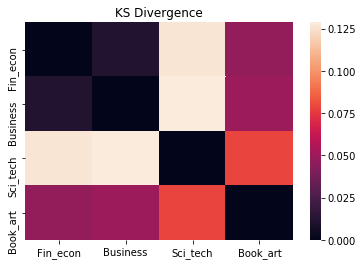

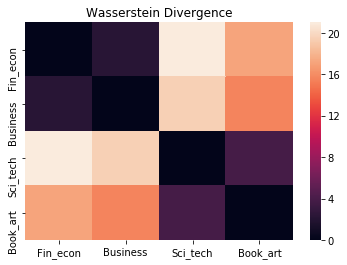

In [12]:
# Divergence plot
plt.figure()
plt.title('KL Divergence')
div = pandas.DataFrame(Diverge_KL, columns = fileids, index = fileids)
sns.heatmap(div)

plt.figure()
plt.title('chi2 Divergence')
div = pandas.DataFrame(Diverge_chi2, columns = fileids, index = fileids)
sns.heatmap(div)

plt.figure()
plt.title('KS Divergence')
div = pandas.DataFrame(Diverge_KS, columns = fileids, index = fileids)
sns.heatmap(div)

plt.figure()
plt.title('Wasserstein Divergence')
div = pandas.DataFrame(Diverge_Wass, columns = fileids, index = fileids)
sns.heatmap(div)

plt.show()

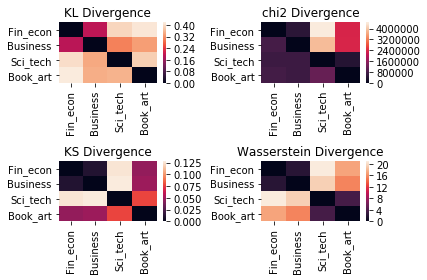

In [10]:
# Divergence plot
plt.figure()
plt.subplot(221)
plt.title('KL Divergence')
div = pandas.DataFrame(Diverge_KL, columns = fileids, index = fileids)
sns.heatmap(div)

plt.subplot(222)
plt.title('chi2 Divergence')
div = pandas.DataFrame(Diverge_chi2, columns = fileids, index = fileids)
sns.heatmap(div)

plt.subplot(223)
plt.title('KS Divergence')
div = pandas.DataFrame(Diverge_KS, columns = fileids, index = fileids)
sns.heatmap(div)

plt.subplot(224)
plt.title('Wasserstein Divergence')
div = pandas.DataFrame(Diverge_Wass, columns = fileids, index = fileids)
sns.heatmap(div)

plt.tight_layout()
plt.show()

In [ ]:
Fin_econ
Business
Sci_tech
Book_art